In [335]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from shapely.geometry import asShape
from descartes import PolygonPatch
from matplotlib import pyplot as plt

In [336]:
df = pd.read_csv("./data/en_v30n4a04 - Sheet1.csv", na_values="-")
df.index = df['DEPTO']

In [337]:
spaces = 5

In [338]:
max_value = df["Per capita alcohol sales"].max()
print(max_value)

10.32


In [345]:
unknown_value = (128,128,128)
bottom_value = (100,5,2)
top_value = (255,255,255)

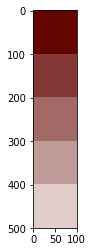

In [346]:
arr = [bottom_value]*100*100
diff = {}
diff['r'] = abs(top_value[0] - bottom_value[0])//spaces
diff['g'] = abs(top_value[1] - bottom_value[1])//spaces
diff['b'] = abs(top_value[2] - bottom_value[2])//spaces
colors = []
colors.append(bottom_value)
for i in range(spaces - 1):
    color = ((bottom_value[0]+diff['r']*(i+1)),(bottom_value[1]+diff['g']*(i+1)),(bottom_value[2]+diff['b']*(i+1)))
    arr = arr + [color]*100*100
    colors.append(color)
arr = np.array(arr).reshape(spaces*100,100,3)
plt.imshow(arr)

In [347]:
ranges_dict = {}

In [349]:
for i in range(spaces):
    ranges_dict[(round(max_value/spaces*i,2), round(max_value/spaces*(i+1),2))] = colors[-1-i]

In [350]:
data = json.load(open("./data/colombia_uni_cmarca.geojson"))

<bound method _AxesBase.clear of <matplotlib.axes._subplots.AxesSubplot object at 0x7f555de4f6a0>>

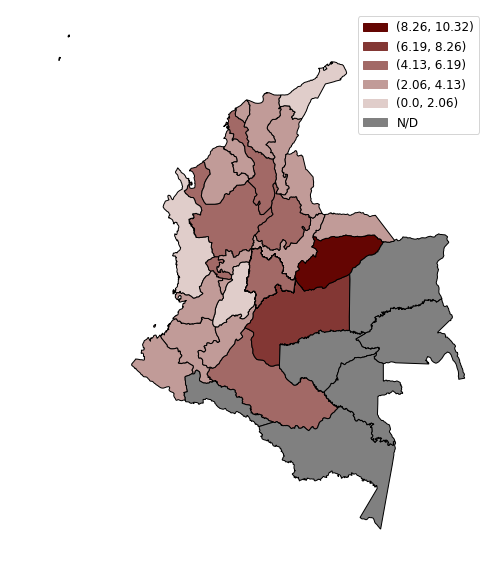

In [351]:
fig = plt.figure(figsize=(8, 10))
plt.axis('off')
ax = fig.gca()
legends = []
for range_i in ranges_dict:
    color = ranges_dict[range_i]
    patch = mpatches.Patch(color=[color[0]/255,color[1]/255,color[2]/255], label=str(range_i))
    legends.append(patch)
legends = list(reversed(legends))
legends.append(mpatches.Patch(color=[unknown_value[0]/255,unknown_value[1]/255,unknown_value[2]/255], label="N/D"))
plt.legend(handles=legends, prop={'size': 12})

for feat in data["features"]:
    std_id = feat["properties"]["STD_ID"]
    geom = asShape(feat["geometry"])
    x, y = geom.centroid.x, geom.centroid.y
    ax.plot(x, y, '-')
    color = unknown_value
    for range_color in ranges_dict:
        if df.loc[std_id][1] >= range_color[0] and df.loc[std_id][1] <= range_color[1]:
            color = ranges_dict[range_color]
    ax.add_patch(PolygonPatch(feat["geometry"], fc=[color[0]/255,color[1]/255,color[2]/255], ec='black',
                alpha=1, lw=1, ls='-', zorder=2))
ax.clear